<a href="https://colab.research.google.com/github/tnehezd/mesa_blue_loop/blob/main/docs/colab_notebooks/mesalab_full_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Running an Example Analysis in `mesalab` with Google Colab


This notebook will guide you through running a full `mesalab` analysis within a Google Colab environment. We'll set up `mesalab`, process a sample of real MESA data to identify specific stellar phenomena, and inspect the results.

The provided example data allows you to test `mesalab`'s core functionality for filtering MESA outputs **without** needing to install the MESA SDK, GYRE, or RSP.

----

### Prerequisites

* An active Google account (for Colab access).

----


## 1.  Set up `mesalab` and Get Example Data

#### 1.1 Clone the ``mesalab`` repository

First, clone the `mesalab` repository from GitHub. This will give you access to the source code and the `example/` directory containing the sample MESA data and configuration files.

> 💡 **Note:** This step is a one-time operation per session.
> If you've already run this cell, you can skip it.


In [1]:
!git clone https://github.com/konkolyseismolab/mesalab

Cloning into 'mesalab'...
remote: Enumerating objects: 16845, done.
remote: Counting objects: 100% (1094/1094), done.
remote: Compressing objects: 100% (246/246), done.
remote: Total 16845 (delta 522), reused 1028 (delta 469), pack-reused 15751 (from 2)
Receiving objects: 100% (16845/16845), 861.33 MiB | 16.16 MiB/s, done.
Resolving deltas: 100% (8768/8768), done.
Updating files: 100% (929/929), done.


----

#### 1.2 Install `mesalab` and its dependencies

Now, install `mesalab` and all its required Python packages.

> 💡 **Note:** This step is a one-time operation per session.
> If you've already run this cell, you can skip it.


In [2]:
# Navigate in the main directory
%cd mesalab

# Install the package
!pip install -e .

/content/mesalab
Obtaining file:///content/mesalab
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mesalab


----

## 2. Examine the Example Data and Configuration


Once you have successfully installed the package, navigate to the `example/` directory within `mesalab/`.

In [4]:
%cd example/

[Errno 2] No such file or directory: 'example/'
/home/buba/Dokumentumok/mesa_blue_loop/docs/colab_notebooks


/usr/lib/python3/dist-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


This directory contains two pre-defined datasets. In this tutorial, we will focus on the `MESA_grid` dataset, which consists of real stellar evolution outputs from MESA. It is designed to demonstrate `mesalab`'s core blue loop filtering and analysis capabilities.

#### 2.1. Dataset Overview

* **Grid Parameters**: The dataset includes a 2x2 grid of models with masses of 4 and 5 M⊙​ and metallicities (Z) of 0.0090 and 0.0100.

* **Evolutionary Coverage**: The simulations cover stellar evolution from the pre-main sequence (pre-MS) to a point after the blue loop phase.

* **Key Feature**: A defining characteristic of this dataset is the differing blue loop behavior: models with 5 M⊙​ exhibit blue loop crossings, while models with 4 M⊙​ do not.


This example dataset is located in the `example/MESA_grid` directory.

The corresponding `example_MESA_base.yaml` configuration file is set up to identify blue loop crossers and generate plots. It also prepares filtered output files, which can be used as input for a subsequent GYRE workflow.

## 3. Run the `MESA_grid` Example

You can easily run your first example by executing `mesalab` with the provided configuration file:

In [18]:
! mesalab --config example_MESA_base.yaml


                    mesalab CLI - Starting Analysis Workflow                    
                              Version: 0.1.0.dev0                               

2025-08-17 04:43:18,225 - WARNING: Holoviews not imported. Some visualizations will not be available.
2025-08-17 04:43:19,343 - WARNING: PyMultiNest not imported.  MultiNest fits will not work.

        Starting MESA Analysis Workflow...

Performing MESA Run Analysis: 100%|███████████████| 4/4 [00:02<00:00,  1.53it/s]

        MESA Analysis Workflow Completed Successfully.


        MESA RSP workflow is disabled in configuration.


        Starting Plotting Workflow...


  Full Instability Strip Crossings Matrix (for Heatmap):
           4.0  5.0
initial_Z          
0.009      0.0  2.0
0.010      0.0  2.0

Calculating BCs serially: 100%|██████████████| 373/373 [00:02<00:00, 183.87it/s]

        Plotting Workflow Completed Successfully.


        GYRE workflow is disabled in configuration (run_gyre_workflow=False).


║       

----

#### 3.1. Checking the Ouput

After a successful run, you will find the generated plots in the `example/MESA_grid_base_output/plots` directory. Here are some examples of the plots generated for this grid:


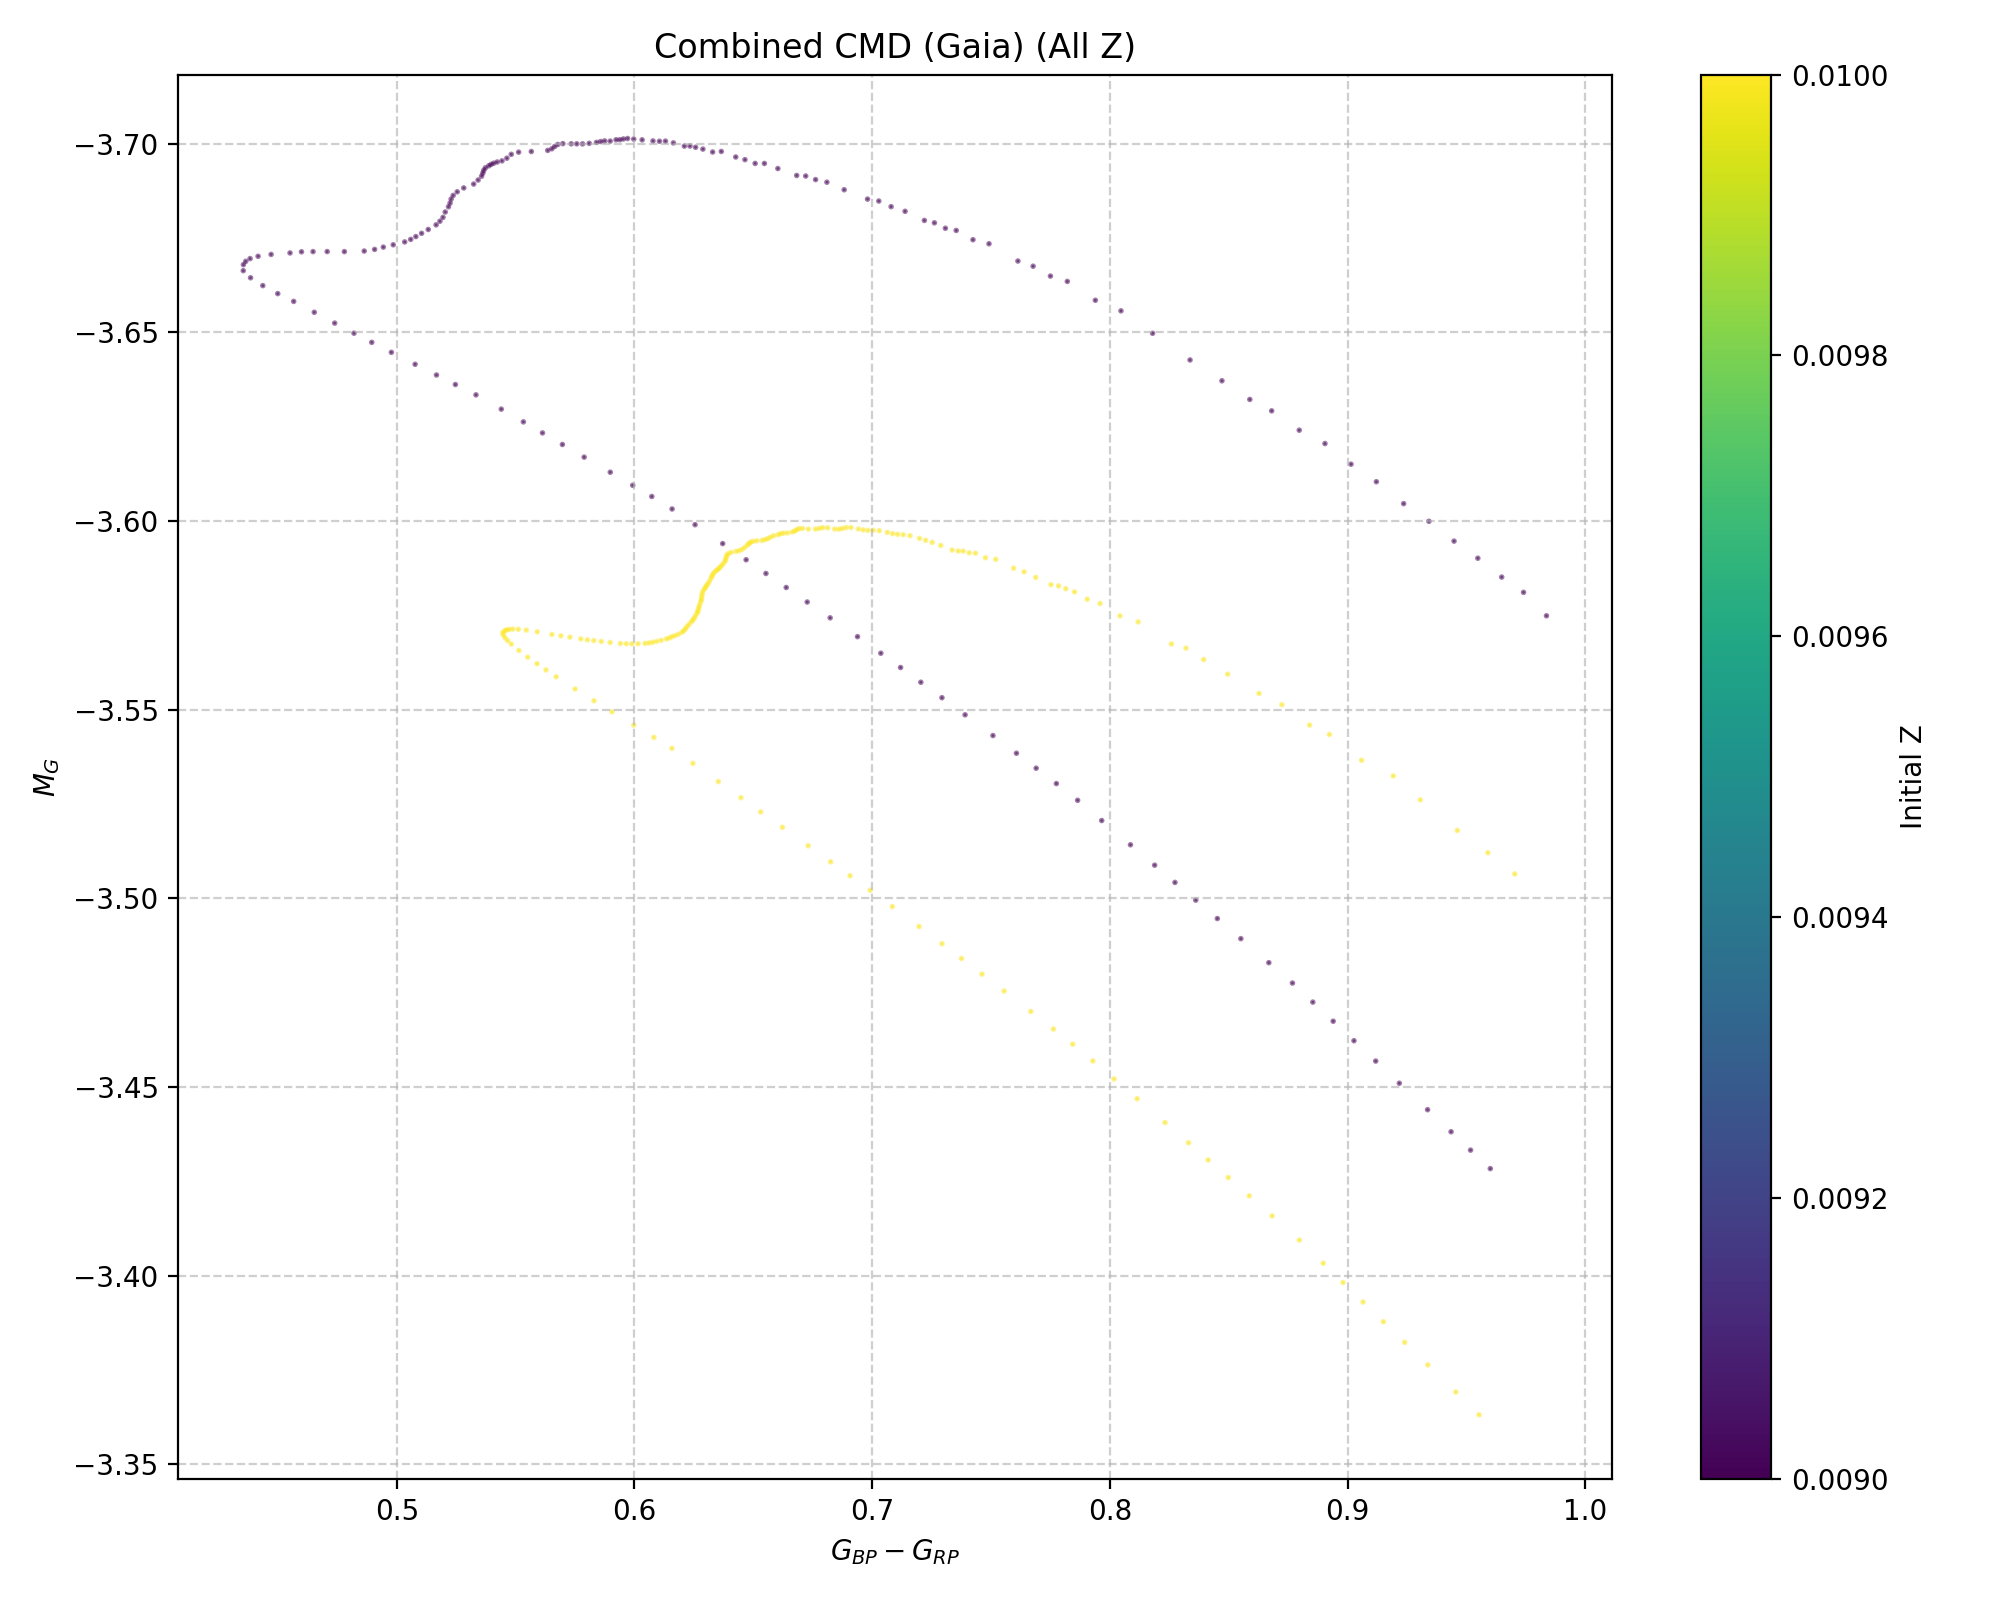

In [23]:
from IPython.display import Image
Image(filename='MESA_grid_base_output/plots/CMD_Gaia_all_blue_loop_data.png')

**Figure 1:** Gaia Color-Magnitude Diagram (CMD) for the 5 Msun models that undergo blue loop evolution. This plot specifically focuses on models that are currently within the blue loop phase and have crossed the red (cool) boundary of the Instability Strip (IS), indicating evolutionary stages relevant for pulsating stars.

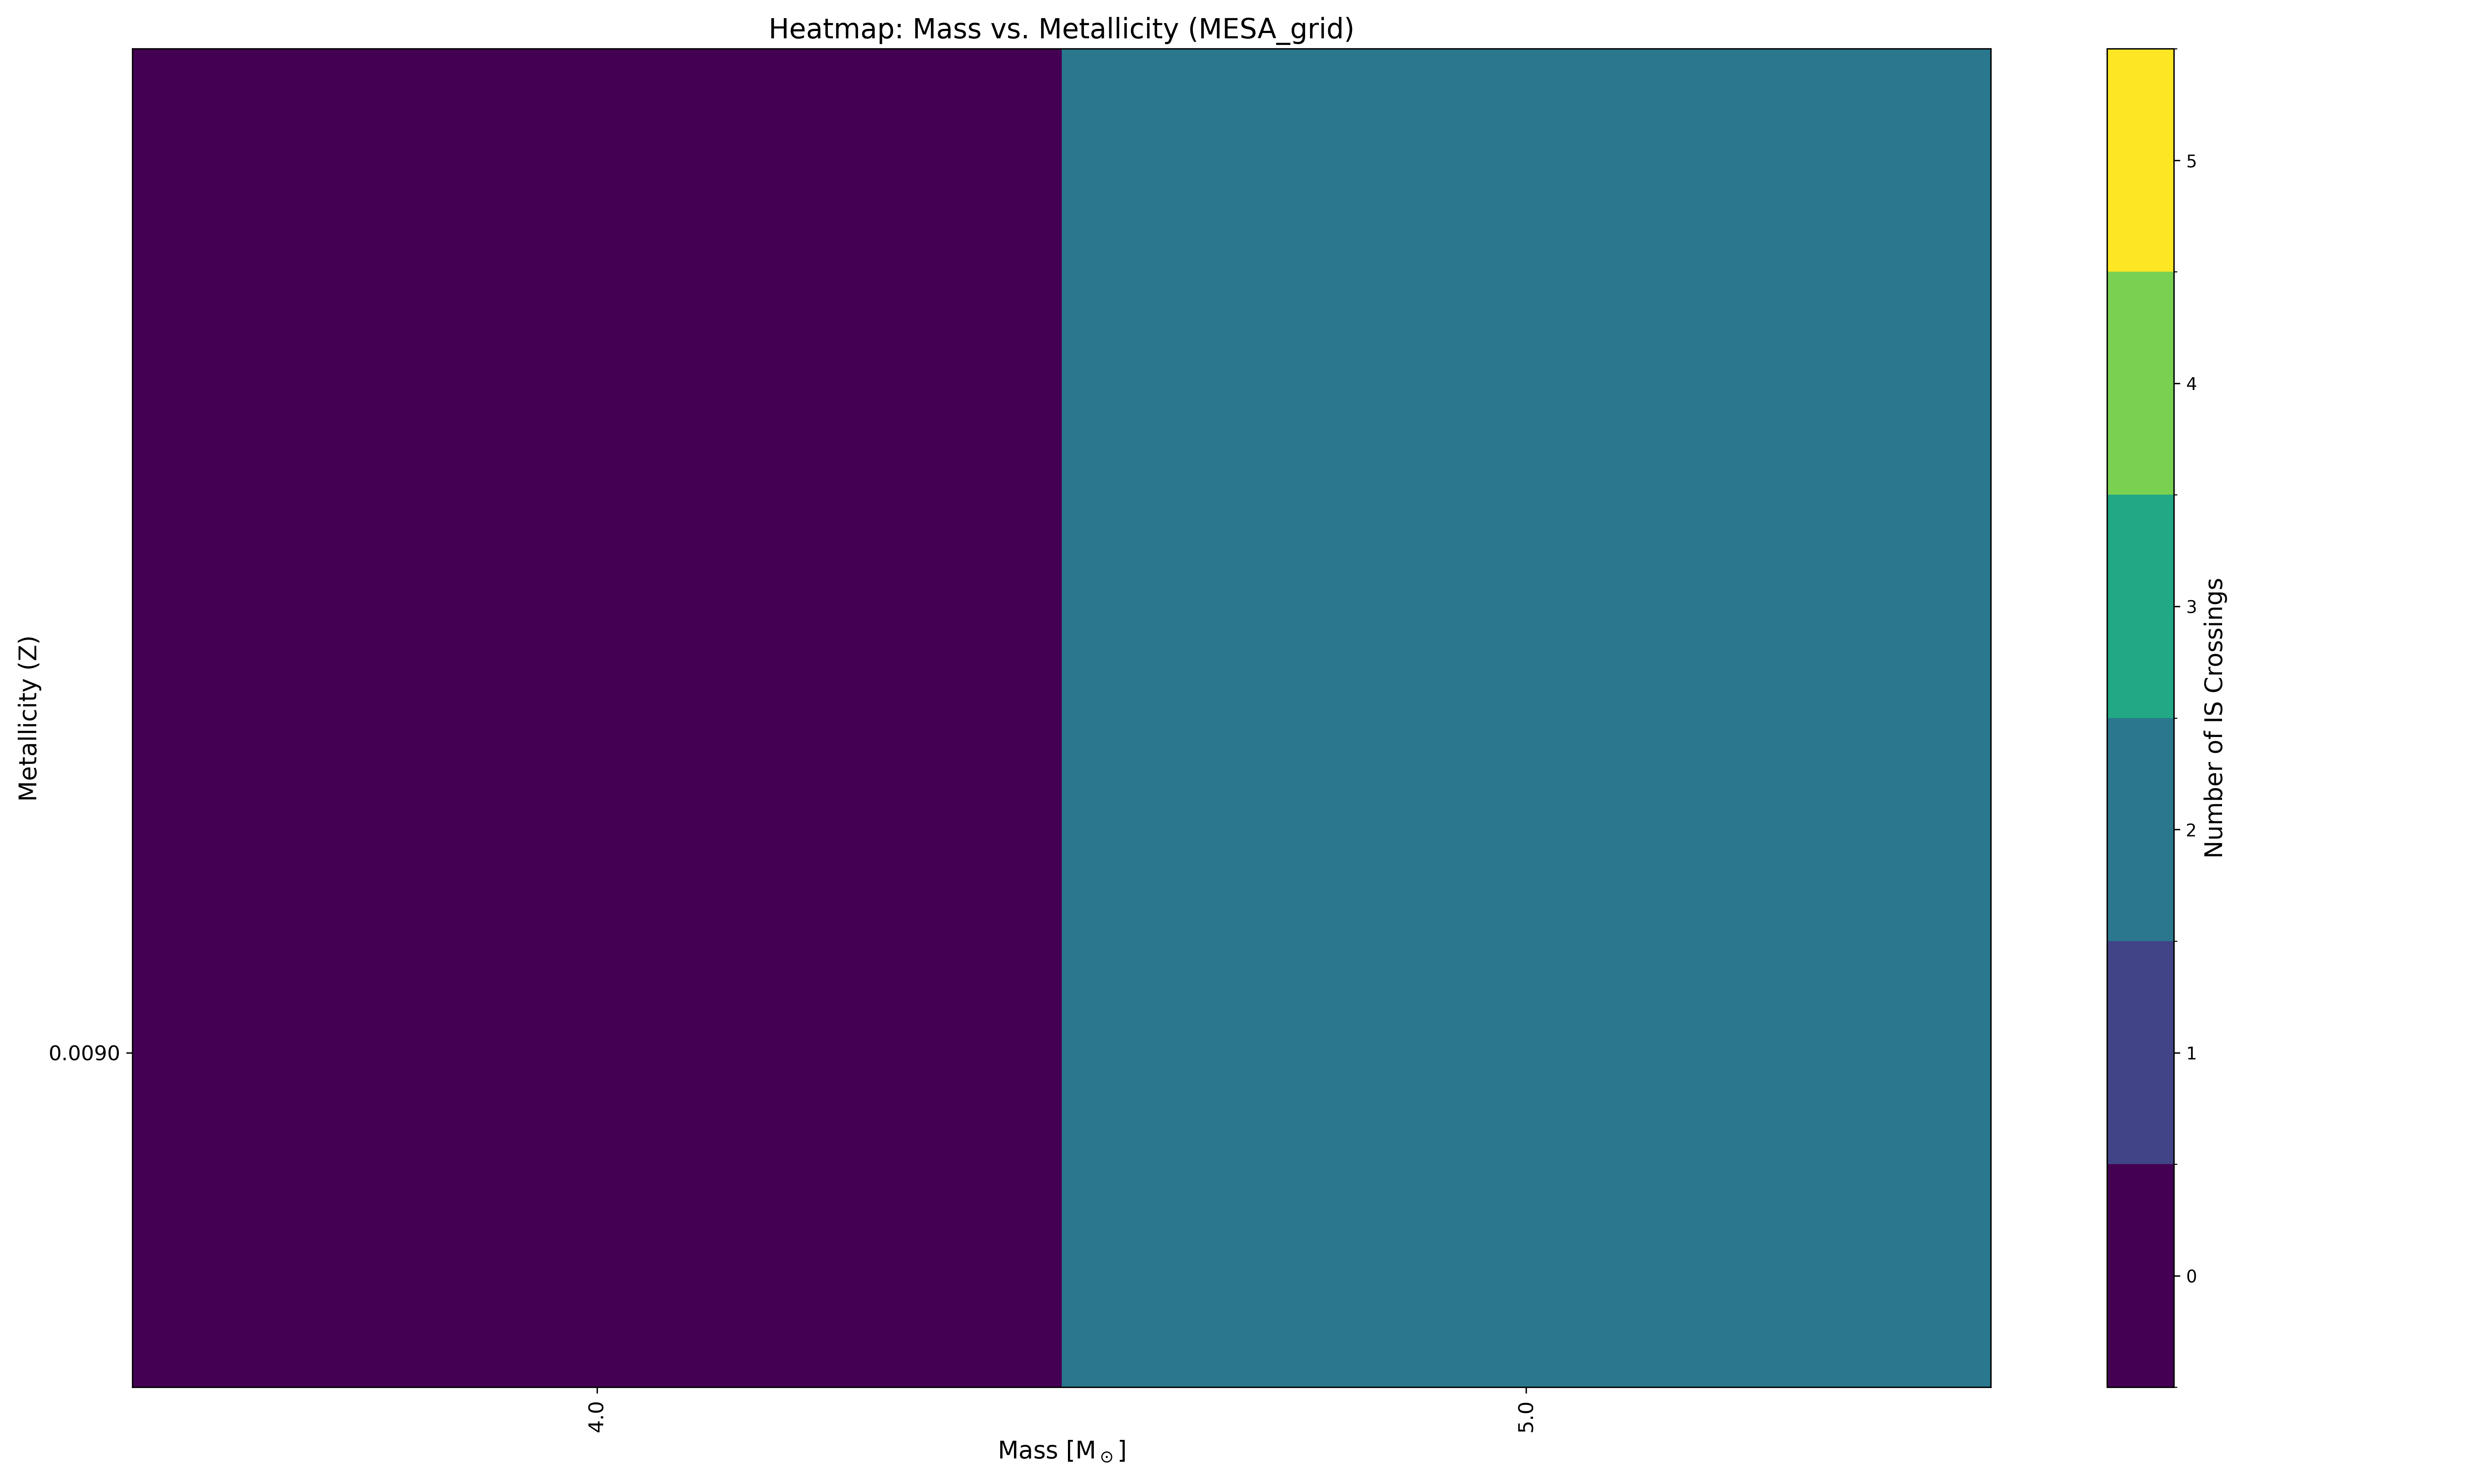

In [25]:
Image(filename='MESA_grid_base_output/plots/mesa_grid_blue_loop_heatmap.png')

**Figure 2:** Heatmap visualizing the number of instability strip crossings for different initial masses and metallicities.

#### 3.2. Additional Plots and CSVs


You can find more plots and CSV files in the `example/MESA_grid_base_output/` directory. These include HR diagrams for each metallicity and a color-magnitude diagram (CMD) of the blue loop evolutionary tracks.